In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import emoji
import string
import nltk
from nltk.corpus import stopwords
import spacy
import re
import time

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df = pd.read_csv('fakeWhatsApp.BR_2018.csv')
df

C:\Users\Miguel António\AppData\Local\Temp\ipykernel_18008\3847491229.py:1: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fakeWhatsApp.BR_2018.csv')


id      date   hour            timestamp ddi country  \
0       3631133147603888180  01/08/18  13:13  2018-08-01 13:13:00  55  BRASIL   
1       3631133147603888180  01/08/18  13:24  2018-08-01 13:24:00  55  BRASIL   
2       3631133147603888180  01/08/18  13:24  2018-08-01 13:24:00  55  BRASIL   
3      -4391661641377612003  01/08/18  13:28  2018-08-01 13:28:00  55  BRASIL   
4      -4391661641377612003  09/08/18  14:46  2018-08-09 14:46:00  55  BRASIL   
...                     ...       ...    ...                  ...  ..     ...   
282596 -3459365403520904542  28/10/18  21:48  2018-10-28 21:48:00   ?       ?   
282597 -3459365403520904542  28/10/18  22:06  2018-10-28 22:06:00   ?       ?   
282598 -3459365403520904542  28/10/18  22:08  2018-10-28 22:08:00   ?       ?   
282599 -3459365403520904542  28/10/18  22:12  2018-10-28 22:12:00   ?       ?   
282600 -3459365403520904542  28/10/18  23:12  2018-10-28 23:12:00   ?       ?   

       country_iso3 ddd      state    group  midia  url  characters  words  \
0               BRA  17  São Paulo   2018_1      1    0          25      4   
1               BRA  17  São Paulo   2018_1      0    0          58      9   
2               BRA  17  São Paulo   2018_1      1    0          25      4   
3               BRA  13  São Paulo   2018_1      0    0           5      1   
4               BRA  13  São Paulo   2018_1      1    0          25      4   
...             ...  ..        ...      ...    ...  ...         ...    ...   
282596            ?   ?          ?  2018_59      1    0          25      4   
282597            ?   ?          ?  2018_59      1    0          25      4   
282598            ?   ?          ?  2018_59      1    0          25      4   
282599            ?   ?          ?  2018_59      1    0          25      4   
282600            ?   ?          ?  2018_59      1    0          25      4   

        types  viral  shares  \
0           4      0       1   
1           9      1       2   
2           4      0       1   
3           1      0       1   
4           4      0       1   
...       ...    ...     ...   
282596      4      0       1   
282597      4      0       1   
282598      4      0       1   
282599      4      0       1   
282600      4      0       1   

                                                     text  misinformation  
0                               <Arquivo de mídia oculto>              -1  
1       O Bolsonaro tem que estar preparado pra respon...              -1  
2                               <Arquivo de mídia oculto>              -1  
3                                                   Boaaa              -1  
4                               <Arquivo de mídia oculto>              -1  
...                                                   ...             ...  
282596                          <Arquivo de mídia oculto>              -1  
282597                          <Arquivo de mídia oculto>              -1  
282598                          <Arquivo de mídia oculto>              -1  
282599                          <Arquivo de mídia oculto>              -1  
282600                          <Arquivo de mídia oculto>              -1  

[282601 rows x 19 columns]

- Only viral menssages from non midiatic sources

In [6]:
df = df[df['viral'] == 1]
df = df[df['midia'] == 0]

- We came from 282601 rows to 20872

In [8]:
print(df.head)

<bound method NDFrame.head of                          id      date   hour            timestamp ddi country  \
1       3631133147603888180  01/08/18  13:24  2018-08-01 13:24:00  55  BRASIL   
15      3631133147603888180  10/08/18  14:31  2018-08-10 14:31:00  55  BRASIL   
26     -4391661641377612003  11/08/18  19:28  2018-08-11 19:28:00  55  BRASIL   
43      3631133147603888180  15/08/18  19:23  2018-08-15 19:23:00  55  BRASIL   
103    -4391661641377612003  22/08/18  22:11  2018-08-22 22:11:00  55  BRASIL   
...                     ...       ...    ...                  ...  ..     ...   
282555   807720138466692852  28/10/18  01:00  2018-10-28 01:00:00   ?       ?   
282556 -8115822708746651359  28/10/18  01:01  2018-10-28 01:01:00   ?       ?   
282558   807720138466692852  28/10/18  02:07  2018-10-28 02:07:00   ?       ?   
282564   807720138466692852  28/10/18  06:42  2018-10-28 06:42:00   ?       ?   
282565   807720138466692852  28/10/18  07:40  2018-10-28 07:40:00   ?       ?  

- Elimination of data there was classified with misinformation = -1

In [9]:
df = df[df["misinformation"] != -1]

- Looking the data

- Misinformation

In [11]:
i = 0
for message in df[df['misinformation'] == 1]['text'].sample(5):
    print(f"Mensagem: {i}\n")
    print(message)
    print("\n")
    i+=1

Mensagem: 0

https://strawpoll.com/wzspzeg6

Vamos votar!!!!
100.000 votos e adivinha que está em primeiro disparado!!!


Mensagem: 1

🤣🤣🤣
Candidata ao Senado por Minas Gerais falando sobre os índios.  
Provavelmente deveriam ser índios das tribos Motorola, Samsung, Philips e outras mais.
👇👇👇


Mensagem: 2

Vamos irritar os Petistas, vamos votar no Bolsonaro na própria, pagina de pesquisas do PT.
http://politicanaveia.com.br/2018/08/24/vote-em-quem-voce-vai-votar-para-presidente/


Mensagem: 3

*Idoso é preso em cabaré após fazer sexo com 4 raparigas e dizer que Ciro Gomes pagaria a conta*

Após a proposta do candidato à presidência Ciro Gomes de tirar o nome dos brasileiro do SPC, vários casos de calote em território nacional já começaram a crescer.

Entre as ocorrências, a mais inusitada até o presente momento se deu na cidade de Pimenteiras, interior do Piauí, onde um aposentado de 78 anos mandou “colocar na conta do Ciro Gomes” o que havia consumido num prostíbulo, (ALGUMAS BEBIDAS

- Non misinformation

In [12]:
i = 0
for message in df[df['misinformation'] == 0]['text'].sample(5):
    print(f"Mensagem: {i}\n")
    print(message)
    print("\n")
    i+=1

Mensagem: 0

A COISA VIROU
90 % dos eleitores brasileiros querem o LULA na URNA. Eu aprovo, inclusive ja vi uma foto.


Mensagem: 1

Série de Estudos - Aspecto Histórico da Revolução Russa e a Crise Marxista [parte 1/3] https://kamargo.com.br/2018/08/13/serie-estudos-aspecto-historico-da-revolucao-russa-e-crise-marxista-parte-1/


Mensagem: 2

Roberto Motta, fundador do Partido Novo, juntamente com João Amoêdo, pede a todos os que iriam votar em Amoêdo que declare agora o seu apoio e voto em Bolsonaro. ISSO É TER RESPONSABILIDADE COM O BRASIL 🇧🇷


Mensagem: 3

Entre já no grupo da página do Facebook : *Bolsonaro Tocantins*.

Envie fotos e vídeos que você deseje que seja publicado na página.

Acompanhe o mito por onde ele estiver.

Junte se as mobilizações espalhadas pelo estado.

Entre através do link 👇

https://chat.whatsapp.com/IKum0Hvjqw3HjGIHmFMinD


Mensagem: 4

Eleições no Japão já deu o resultado: 5000votos para Bolsonaro e 200votos para Haddad, Começou a surra nas urnas!!!




- Corpus statistics

In [15]:
df.describe()[['characters','words','shares']]

characters         words        shares
count  18951.000000  18951.000000  18951.000000
mean     574.501293     87.253390     11.885230
std      929.443834    142.718198     16.573243
min       38.000000     10.000000      2.000000
25%      132.000000     19.000000      2.000000
50%      222.000000     33.000000      5.000000
75%      551.000000     85.000000     13.000000
max    15683.000000   2664.000000     91.000000

- Removing duplicates

In [16]:
df = df.drop_duplicates(subset=['text'])

- Definition of X and y

In [17]:
texts = df[df['midia'] == 0]['text']
y = df[df['midia'] == 0]['misinformation']

data after remove duplicates


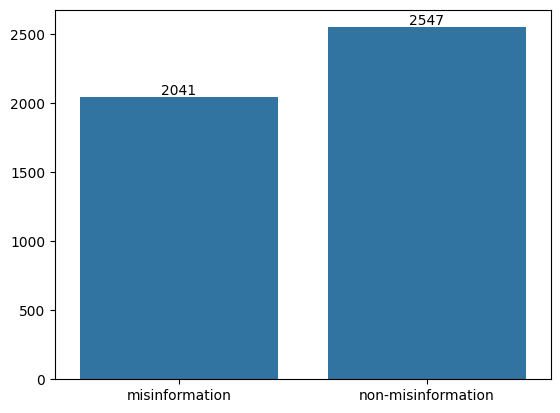

In [19]:
print('data after remove duplicates')
pos_mask = y == 1 
pos = y[pos_mask]
neg_mask = y == 0 
neg = y[neg_mask]
values = [pos.shape[0],neg.shape[0]]
keys = ['misinformation', 'non-misinformation']
g = sns.barplot(x = keys, y = values)
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                               p.get_height()), ha = 'center', 
               va = 'center', xytext = (0, 5), textcoords = 'offset points')

- Lenght of the data used

In [20]:
print(len(texts))
print(len(y))

4588
4588


- Misinformation column statistics

In [22]:
df.columns

Index(['id', 'date', 'hour', 'timestamp', 'ddi', 'country', 'country_iso3',
       'ddd', 'state', 'group', 'midia', 'url', 'characters', 'words', 'types',
       'viral', 'shares', 'text', 'misinformation'],
      dtype='object')

In [24]:
def avgSizeWords(string):
     list_string = string.split()
     chars = np.array([len(s) for s in list_string])
     return chars.mean()    
df['types'] = [len(set(t.split())) for t in df['text']]
df['types/token ratio'] = df['types']/df['words']
df['char/word ratio'] = df['characters']/df['words']
df['average chars by word'] = [avgSizeWords(t) for t in df['text']]

C:\Users\Miguel António\AppData\Local\Temp\ipykernel_18008\1711491062.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['types'] = [len(set(t.split())) for t in df['text']]
C:\Users\Miguel António\AppData\Local\Temp\ipykernel_18008\1711491062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['types/token ratio'] = df['types']/df['words']
C:\Users\Miguel António\AppData\Local\Temp\ipykernel_18008\1711491062.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [26]:
mis = df[df['misinformation']==1][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','shares']].mean().to_frame().rename(columns={0: "misinformation"})
non_mis = df[df['misinformation']==0][['words','types','types/token ratio' ,'characters', 'char/word ratio', 'average chars by word','shares']].mean().to_frame().rename(columns={0: "non-misinformation"})
mis.join(non_mis, lsuffix='_misinformation', rsuffix='_non-misinformation')

misinformation  non-misinformation
words                      113.870652           60.044366
types                       78.719255           44.574401
types/token ratio            0.845943            0.899166
characters                 719.406663          408.918728
char/word ratio              6.590809            7.231410
average chars by word        5.529126            6.174667
shares                       4.974032            3.454653

- Pre-processing

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Miguel
[nltk_data]     António\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [37]:
#emojis and punctuation
emojis_list = list(emoji.EMOJI_DATA.keys())
emojis_list += ['\n']
punct = list(string.punctuation) + ['\n']
emojis_punct = emojis_list + punct

def processEmojisPunctuation(text, remove_punct = False, remove_emoji = False):
    '''
    Put spaces between emojis. Removes punctuation.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        
        if remove_punct: #remove punctuation            
            if c in punct: 
                text = text.replace(c, ' ')
        else: #put spaces between punctuation
            if c in punct:
                text = text.replace(c, ' ' + c + ' ')
        
        if remove_emoji: #remove emojis
            if c in emojis_list:
                text = text.replace(c, ' ')
        else: #put spaces between emojis
            if c in emojis_list:
                text = text.replace(c, ' ' + c + ' ')                        
            
    text = re.sub(' +', ' ', text)
    return text

#stop words removal
stop_words = list(stopwords.words('portuguese'))
new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','vc', 'bom', 'ai','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo']
stop_words = stop_words + new_stopwords
final_stop_words = []
for sw in stop_words:
    sw = ' '+ sw + ' '
    final_stop_words.append(sw)

def removeStopwords(text):
    for sw in final_stop_words:
        text = text.replace(sw,' ')
    text = re.sub(' +',' ',text)
    return text

#lemmatization
nlp = spacy.load('pt_core_news_sm')
def lemmatization(text):
    doc = nlp(text)
    for token in doc:
        if token.text != token.lemma_:
            text = text.replace(token.text, token.lemma_)
    return text
    

def domainUrl(text):
    '''
    Substitutes an URL in a text for the domain of this URL
    Input: an string
    Output: the string with the modified URL
    '''    
    if 'http' in text:
        re_url = '[^\s]*https*://[^\s]*'
        matches = re.findall(re_url, text, flags=re.IGNORECASE)
        for m in matches:
            domain = m.split('//')
            domain = domain[1].split('/')[0]
            text = re.sub(re_url, domain, text, 1)
        return text
    else:
        return text
    
def processLoL(text):
    re_kkk = 'kkk*'
    t = re.sub(re_kkk, "kkk", text, flags=re.IGNORECASE)
    return t

def firstSentence(text):
    list_s = re.split('; |\. |\! |\? |\n',text)
    for s in list_s:
        if s is not None:
            return s
    

def preprocess(text,semi=False, rpunct = False, remoji = False, sentence = False):
    if sentence:
        text = firstSentence(text) # remove
    text = text.lower().strip()
    text = domainUrl(text)
    text = processLoL(text)
    text = processEmojisPunctuation(text,remove_punct = rpunct, remove_emoji=remoji)
    if semi:        
        return text
    text = removeStopwords(text)
    text = lemmatization(text)
    return text
           

In [42]:
texts = df['pre_processed_text'] = [preprocess(t, sentence = True) for t in texts]

C:\Users\Miguel António\AppData\Local\Temp\ipykernel_18008\2593175255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts = df['pre_processed_text'] = [preprocess(t, sentence = True) for t in texts]


- Only retain one hundred words for each text

In [44]:
def trucateText(text):
    words = text.split()
    if len(words) <= 100:
        return text
    else:
        words = words[0:100]
        text = ' '.join(words)
        return text

In [45]:
texts = [trucateText(t) for t in texts]

- Vectorization

In [57]:
vectorization = ['tfidf-']
ngrams = ['unigram_bigram_trigram']
processed = ['-pre_processed']
max_features = ['']#,'-max_features']
balancing = ['-oversampling']
experiments = []

for vec in vectorization:
    for ng in ngrams:
        for p in processed:
            for m in max_features:
                exp = vec+ng+p+m
                experiments.append(exp)

print(len(experiments))
experiments


1


['tfidf-unigram_bigram_trigram-pre_processed']

- Train-test split

In [58]:
texts_train, texts_test, y_train, y_test = train_test_split(texts,y,test_size=0.2,stratify=y,random_state=42)

In [59]:
def defineVectorizing(experiment):
    max_feat = None
    # maximum number of features
    if 'max_features' in experiment:
        max_feat = 5000
    exp_parts = experiment.split('-')
    vec = exp_parts[0]
    ngram = exp_parts[1]
    # ngram
    if ngram == 'unigram':
        ng = (1,1)
    elif ngram == 'unigram_bigram':
        ng = (1,2)
    elif ngram == 'unigram_bigram_trigram':
        ng = (1,3)
    # vectorizer
    if vec == 'bow':
        vectorizer = CountVectorizer(max_features = max_feat, binary=True, ngram_range = ng, lowercase = False, token_pattern = r'[^\s]+')
    elif vec == 'tfidf':
        vectorizer = TfidfVectorizer(max_features = max_feat, ngram_range = ng, lowercase = False, token_pattern = r'[^\s]+')
    
    return vectorizer

def vectorizing(vectorizer,texts_train,texts_test):
    vectorizer.fit(texts_train)   
    X_train = vectorizer.transform(texts_train)
    X_test = vectorizer.transform(texts_test)
    #print('Train:',X_train.shape)
    #print('Test:',X_test.shape)
    return X_train, X_test

vectorizer = defineVectorizing(experiments[0])
X_train,X_test = vectorizing(vectorizer,texts_train,texts_test)

- Models Train and Test

In [62]:
models = ['lr','nb','lsvm','sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']
print(len(models))
models

9


['lr', 'nb', 'lsvm', 'sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']

In [63]:
def getTestMetrics(y_true, y_pred, y_prob=None, full_metrics=False):
    # Importar funções sklearn com apelidos locais
    from sklearn.metrics import (
        accuracy_score as sk_accuracy,
        precision_score as sk_precision,
        recall_score as sk_recall,
        f1_score as sk_f1,
        roc_auc_score as sk_roc_auc
    )
    import numpy as np

    acc = sk_accuracy(y_true, y_pred)
    precision = sk_precision(y_true, y_pred, average='macro')
    recall = sk_recall(y_true, y_pred, average='macro')
    f1 = sk_f1(y_true, y_pred, average='macro')

    try:
        roc_auc = sk_roc_auc(y_true, y_prob, multi_class='ovr')
    except Exception:
        roc_auc = np.nan

    # placeholders para compatibilidade
    precision_neg = recall_neg = f1_neg = np.nan

    if full_metrics:
        print(f"Accuracy: {acc:.3f}")
        print(f"Precision (macro): {precision:.3f}")
        print(f"Recall (macro): {recall:.3f}")
        print(f"F1 (macro): {f1:.3f}")
        print(f"AUC: {roc_auc:.3f}")

    return acc, precision, precision_neg, recall, recall_neg, f1, f1_neg, roc_auc


In [73]:
def lr_eval(X_train,y_train,X_test,y_test):
    #print('Logistic Regression')
    logreg = LogisticRegression().fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    y_prob = logreg.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True)

def nb_eval(X_train,y_train,X_test,y_test):    
    if 'bow' in experiments[0]:
        #print('Bernoulli Naive-Bayes')
        nb = BernoulliNB().fit(X_train, y_train)
    elif 'tfidf' in experiments[0]:
        #print('Complement Naive-Bayes')
        nb = ComplementNB().fit(X_train, y_train)
    # print('Bernoulli Naive-Bayes')
    y_pred = nb.predict(X_test)
    y_prob = nb.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True)

def lsvm_eval(X_train,y_train,X_test,y_test):
    #print('Linear Support Vector Machine')
    svm = LinearSVC(dual=False).fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return getTestMetrics(y_test, y_pred, full_metrics = True)

def sgd_eval(X_train,y_train,X_test,y_test):
    #print('Linear SVM with SGD training')
    sgd = SGDClassifier().fit(X_train, y_train)
    y_pred = sgd.predict(X_test)
    return getTestMetrics(y_test, y_pred, full_metrics = True)

def svm_eval(X_train,y_train,X_test,y_test):
    #print('SVM with RBF kernel')
    #svm = SVC(probability=True).fit(X_train, y_train)
    svc = SVC(probability=True).fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_prob = svc.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred,y_prob, full_metrics = True)

def knn_eval(X_train,y_train,X_test,y_test):
    #print('KNN')
    knn = KNeighborsClassifier(weights='distance',n_jobs=-1).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True)

def rf_eval(X_train,y_train,X_test,y_test):
    #print('Random Forest')
    #rf = RandomForestClassifier(n_estimators=200,n_jobs=-1).fit(X_train, y_train)
    rf = RandomForestClassifier(n_jobs=-1).fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    y_prob = rf.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True)

def gb_eval(X_train,y_train,X_test,y_test):
    #print('Gradient Boosting')
    gb = GradientBoostingClassifier(n_estimators=200).fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    y_prob = gb.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True)

def mlp_eval(X_train,y_train,X_test,y_test):
    #print('Multilayer perceptron')
    mlp = MLPClassifier(verbose=True, early_stopping= True, batch_size=64, n_iter_no_change = 5, tol = 1e-3).fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    y_prob = mlp.predict_proba(X_test)[:,1]
    return getTestMetrics(y_test, y_pred, y_prob, full_metrics = True)

def model_eval(model,X_train,y_train,X_test,y_test):
    if model == 'lr':
        return lr_eval(X_train,y_train,X_test,y_test)
    elif model == 'nb':
        return nb_eval(X_train,y_train,X_test,y_test)
    elif model == 'lsvm':
        return lsvm_eval(X_train,y_train,X_test,y_test)
    elif model == 'sgd':
        return sgd_eval(X_train,y_train,X_test,y_test)
    elif model == 'svm':
        return svm_eval(X_train,y_train,X_test,y_test)
    elif model == 'knn':
        return knn_eval(X_train,y_train,X_test,y_test)
    elif model == 'rf':
        return rf_eval(X_train,y_train,X_test,y_test)
    elif model == 'gb':
        return gb_eval(X_train,y_train,X_test,y_test)
    elif model == 'mlp':
        return mlp_eval(X_train,y_train,X_test,y_test)

#lsvm_eval(X_train,y_train,X_test,y_test)
model_eval('rf',X_train,y_train,X_test,y_test)

Accuracy: 0.653
Precision (macro): 0.649
Recall (macro): 0.649
F1 (macro): 0.649
AUC: 0.735


(0.6525054466230937,
 0.648666695386206,
 nan,
 0.649264705882353,
 nan,
 0.6489020771513353,
 nan,
 0.7348880238369858)

In [74]:
model_list = ['lr', 'nb', 'lsvm', 'sgd', 'svm', 'knn', 'rf', 'gb', 'mlp']

for m in model_list:
    print(f"\n🔹 Avaliando modelo: {m.upper()}")
    results = model_eval(m, X_train, y_train, X_test, y_test)
    print(f"Resultados ({m}):", results)



🔹 Avaliando modelo: LR
Accuracy: 0.692
Precision (macro): 0.689
Recall (macro): 0.681
F1 (macro): 0.682
AUC: 0.750
Resultados (lr): (0.6917211328976035, 0.6889693900574093, nan, 0.6811274509803922, nan, 0.6824325398038077, nan, 0.7501706074586698)

🔹 Avaliando modelo: NB
Accuracy: 0.705
Precision (macro): 0.701
Recall (macro): 0.699
F1 (macro): 0.700
AUC: 0.785
Resultados (nb): (0.7047930283224401, 0.7009952327960307, nan, 0.6987745098039215, nan, 0.6995735934682876, nan, 0.7851667627835448)

🔹 Avaliando modelo: LSVM
Accuracy: 0.706
Precision (macro): 0.703
Recall (macro): 0.704
F1 (macro): 0.703
AUC: nan
Resultados (lsvm): (0.7058823529411765, 0.7026247848537005, nan, 0.7036764705882352, nan, 0.703027950310559, nan, nan)

🔹 Avaliando modelo: SGD
Accuracy: 0.699
Precision (macro): 0.697
Recall (macro): 0.699
F1 (macro): 0.697
AUC: nan
Resultados (sgd): (0.6993464052287581, 0.6967592592592593, nan, 0.6985294117647058, nan, 0.6971600688468158, nan, nan)

🔹 Avaliando modelo: SVM
Accuracy

# Experiences

## Experience 1 - Generating LIME explanations for each model predictions and compared the words that appear the most

In [78]:
import numpy as np
import pandas as pd
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt